Cx = y

C = target composition matrix; the jth column is the composition of target j (the ith row is the amount of element i)

x = target fraction vector; the ith value corresponds to the fraction of target i

y = resulting composition vector

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pymatgen as mg
import ternary


In [3]:
targets = ['BaZr0.1Fe0.9O3',
    'BaZr0.1Co0.9O3',
    'BaZr0.9Co0.1O3',
    'BaZr0.6Y0.3Fe0.1O3',
    'BaZr0.1Y0.1Fe0.3Co0.5O3',
    'BaZr0.8Y0.2O3']

Bsite = ['Co','Fe','Y','Zr']

In [4]:
tc_arr = np.zeros((len(Bsite),len(targets)))
for j,t in enumerate(targets):
    tc = mg.Composition(t)
    for i,x in enumerate(Bsite):
        tc_arr[i,j] = tc.get_el_amt_dict()[x]
    

In [5]:
tc_arr

array([[0. , 0.9, 0.1, 0. , 0.5, 0. ],
       [0.9, 0. , 0. , 0.1, 0.3, 0. ],
       [0. , 0. , 0. , 0.3, 0.1, 0.2],
       [0.1, 0.1, 0.9, 0.6, 0.1, 0.8]])

In [6]:
tc3 = tc_arr[:,0:3] #first 3 targets - no Y
t_rng = np.arange(0,3) #
x_rng = np.arange(0,1,0.01)
points = []
for x in x_rng:
    v = [1-x, x] #target fraction vector
    vc = np.dot(tct,v)
    vcl = [vc[0],vc[1],vc[3]]
    points.append(vcl)
    
np.where(t_rng!=2)

NameError: name 'tct' is not defined

In [7]:
#plot a line between each pair of targets
tc3 = tc_arr[:,0:3] #first 3 targets - no Y
t_rng = np.arange(0,3) #
x_rng = np.arange(0,1,0.01)
points = []

for t1 in t_rng:
    for t2 in np.where(t_rng>t1)[0]:
        tct = tc_arr[:,(t1,t2)]
        for x in x_rng:
            v = [1-x, x] #target fraction vector
            vc = np.dot(tct,v)
            vcl = [vc[0],vc[1],vc[3]]
            points.append(vcl)
        

In [25]:
#plot a plane between each set of 3 targets
points = []
for x1 in x_rng:
    for x2 in x_rng[np.where(x_rng<=1-x1)[0]]:
        x3 = 1 - x1 - x2
        v = [x1,x2,x3]
        vc = np.dot(tc3,v)
        vcl = [vc[0],vc[1],vc[3]]
        points.append(vcl)

In [26]:
v

[0.99, 0.01, 8.673617379884035e-18]

In [14]:
len(points)

5149

(-0.05, 1.05, -0.1, 0.9)

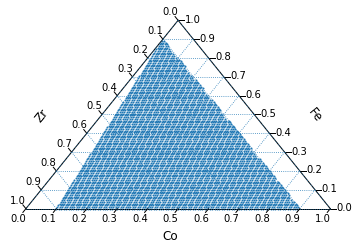

In [28]:
scale = 1
tfig, tax = ternary.figure(scale=scale)
tax.scatter(points,s=1)
tax.boundary(linewidth=1)
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr',linewidth=1,multiple=0.1,tick_formats='%.1f',offset=0.02)
tax.gridlines(multiple=scale/10,linewidth=0.8)
tax.bottom_axis_label('Co',offset=0.1,fontsize=12)
tax.right_axis_label('Fe',offset=0.2,fontsize=12)
tax.left_axis_label('Zr',offset=0.2,fontsize=12)
tax._redraw_labels()
plt.gca().axis('off')

In [96]:
df

,key,BaZr0.1Fe0.9O3,BaZr0.1Co0.9O3,BaZr0.9Co0.1O3,BaZr0.6Y0.3Fe0.1O3,BaZr0.1Y0.1Fe0.3Co0.5O3,BaZr0.8Y0.2O3,frac_sum,Co,Fe,Y,Zr
730,0,0.0,0.0,0.0,0.6,0.0,0.4,1.0,0.00,0.06,0.26,0.68
740,0,0.0,0.0,0.0,0.6,0.1,0.3,1.0,0.05,0.09,0.25,0.61
850,0,0.0,0.0,0.0,0.7,0.0,0.3,1.0,0.00,0.07,0.27,0.66
860,0,0.0,0.0,0.0,0.7,0.1,0.2,1.0,0.05,0.10,0.26,0.59
870,0,0.0,0.0,0.0,0.7,0.2,0.1,1.0,0.10,0.13,0.25,0.52
970,0,0.0,0.0,0.0,0.8,0.0,0.2,1.0,0.00,0.08,0.28,0.64
980,0,0.0,0.0,0.0,0.8,0.1,0.1,1.0,0.05,0.11,0.27,0.57
990,0,0.0,0.0,0.0,0.8,0.2,0.0,1.0,0.10,0.14,0.26,0.50
1090,0,0.0,0.0,0.0,0.9,0.0,0.1,1.0,0.00,0.09,0.29,0.62
1100,0,0.0,0.0,0.0,0.9,0.1,0.0,1.0,0.05,0.12,0.28,0.55


In [3]:
conn = odbc.connect("DRIVER={SQL Server};SERVER=MME-DESKTOP24\SQLEXPRESS01;Trusted_Connection=yes;DATABASE=Test")

In [73]:
cur = conn.cursor()
cur.execute('select * from TargetFractions')
results = cur.fetchall()

targets = ['BaZr0.1Fe0.9O3',
    'BaZr0.1Co0.9O3',
    'BaZr0.9Co0.1O3',
    'BaZr0.6Y0.3Fe0.1O3',
    'BaZr0.1Y0.1Fe0.3Co0.5O3',
    'BaZr0.8Y0.2O3']

tarcomp = {}
for t in targets:
    tc = mg.Composition(t)
    tarcomp[t] = tc.get_el_amt_dict()

Bsite = ['Co','Fe','Y','Zr']

target_frac = pd.DataFrame(results, columns=targets + ['FracSum','Co','Fe','Y','Zr'])
target_frac

,BaZr0.1Fe0.9O3,BaZr0.1Co0.9O3,BaZr0.9Co0.1O3,BaZr0.6Y0.3Fe0.1O3,BaZr0.1Y0.1Fe0.3Co0.5O3,BaZr0.8Y0.2O3,FracSum,Co,Fe,Y,Zr
0,0.150,0.125,0.000,0.000,0.475,0.250,1.0,0.3500,0.2775,0.0975,0.2750
1,0.150,0.125,0.000,0.000,0.500,0.225,1.0,0.3625,0.2850,0.0950,0.2575
2,0.150,0.125,0.000,0.000,0.525,0.200,1.0,0.3750,0.2925,0.0925,0.2400
3,0.150,0.125,0.000,0.000,0.550,0.175,1.0,0.3875,0.3000,0.0900,0.2225
4,0.150,0.125,0.000,0.000,0.575,0.150,1.0,0.4000,0.3075,0.0875,0.2050
5,0.150,0.125,0.000,0.000,0.600,0.125,1.0,0.4125,0.3150,0.0850,0.1875
6,0.150,0.125,0.000,0.000,0.625,0.100,1.0,0.4250,0.3225,0.0825,0.1700
7,0.150,0.125,0.000,0.000,0.650,0.075,1.0,0.4375,0.3300,0.0800,0.1525
8,0.150,0.125,0.000,0.000,0.675,0.050,1.0,0.4500,0.3375,0.0775,0.1350
9,0.150,0.125,0.000,0.000,0.700,0.025,1.0,0.4625,0.3450,0.0750,0.1175


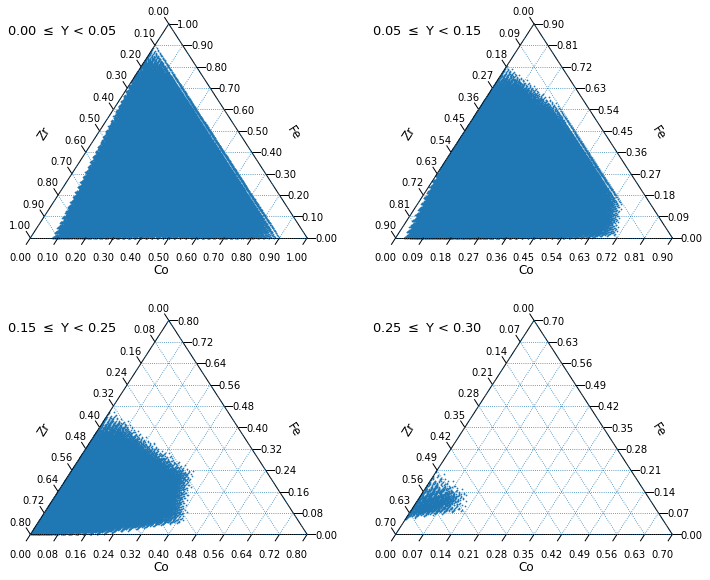

In [75]:
fig, axes = plt.subplots(2,2,figsize=(12,10))
dY = 0.1
Y_frac = np.arange(0,0.31,dY)
for i, nY in enumerate(Y_frac):
    df = target_frac[(target_frac['Y']>=nY-dY/2) & (target_frac['Y']<=nY+dY/2)]
    points = df.loc[:,['Co','Fe','Zr']].values
    #colors = df.loc[:,'fwhm_110'].values
    
    ax=axes[int(i/2), i%2]
    
    scale = 1 - nY #point coords must sum to scale
    #since each comp has different Y value, need to scale points to plot scale
    ptsum = np.sum(points,axis=1)[np.newaxis].T
    scaled_pts = points*scale/ptsum
    
    tfig, tax = ternary.figure(scale=scale,ax=ax)
    tax.scatter(scaled_pts,s=0.5)
                #,vmin=0.45,vmax=0.6,colormap=plt.cm.viridis,
                #colorbar=True,c=colors, cbarlabel='Predicted 110 FWHM')
    tax.boundary(linewidth=1.0)
    tax.clear_matplotlib_ticks()
    tax.ticks(axis='lbr', linewidth=1, multiple=scale/10, tick_formats='%.2f',offset=0.03)
    tax.gridlines(multiple=scale/10,linewidth=0.8)
    tax.bottom_axis_label('Co',offset=0.1,fontsize=12)
    tax.right_axis_label('Fe',offset=0.2,fontsize=12)
    tax.left_axis_label('Zr',offset=0.2,fontsize=12)
    tax.set_title('{0:.2f} $\leq$ Y < {1:.2f}'.format(max(0,nY-dY/2),min(nY+dY/2,0.3)),fontsize=13,x=0.15,y=0.9)
    tax._redraw_labels()
    ax.axis('off')

In [61]:
target_frac['BaZr0.1Fe0.9O3'][0]

0.0

In [64]:
len(results)

230230